# Kmeans clustering

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]

In [13]:
df = pd.read_csv('Data/15_Feb_C1_Bad_Case_8am.csv')

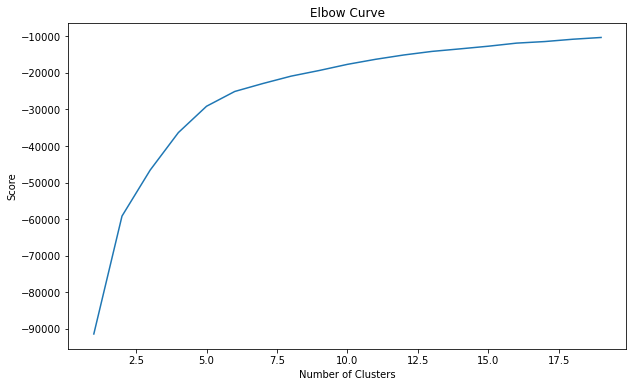

In [14]:
data = df[triads[5]]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

Elbow curves levels after about 6 clusters implying that the addition of more clusters do not explain much more of the variance in our relevant variable;

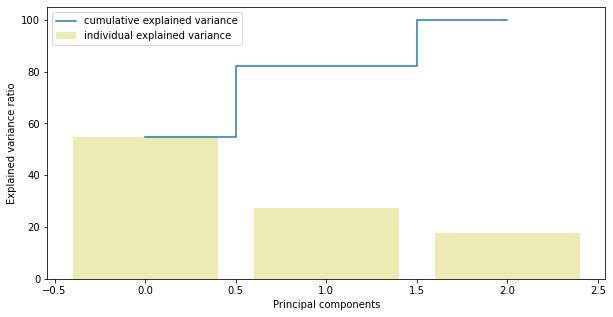

In [50]:
data = df[triads[5]]
X = data.values
X_std = StandardScaler().fit_transform(X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance



plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

We see that the first component explains almost 55% of the variance. The second component explains over 30%. However, notice that almost none of the components are really negligible. The first 2 components contain over 85% of the information. So, we will set n_components=2.

The underlying assumption in the clustering-based anomaly detection is that if we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters, or belong to small clusters. 

In [72]:
def getDistanceByPoint(data, model):
   distance = pd.Series()
   for i in range(0,len(data)):
       Xa = np.array(data.loc[i])
       Xb = model.cluster_centers_[model.labels_[i]-1]
       distance.at[i]=np.linalg.norm(Xa-Xb)
   return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[5])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly)
df['anomaly1'] = (distance >= threshold).astype(int)

<ipython-input-72-c0f9902beb12>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distance = pd.Series()


In [65]:
a = df.loc[df['anomaly1'] == 1]

In [69]:
result_set= a.index.tolist()


[407, 408, 532, 533, 534, 656]

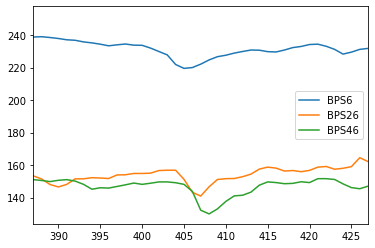

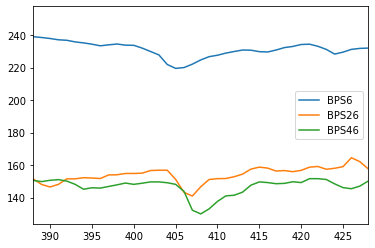

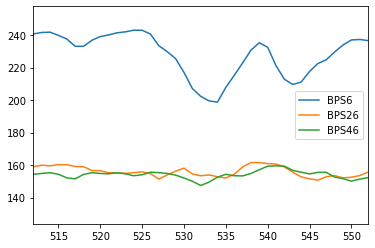

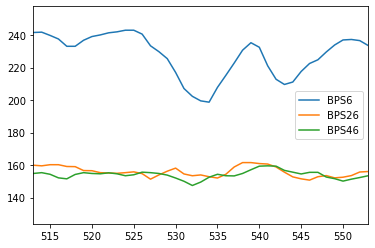

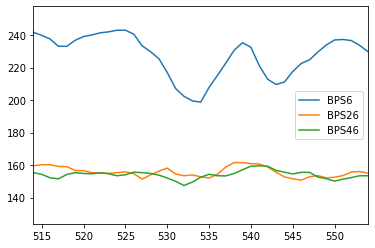

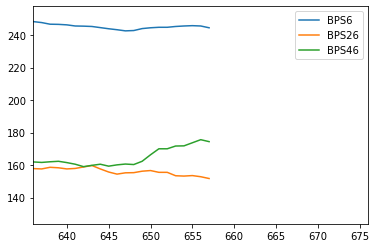

In [68]:
for i in result_set:
    df[triads[5]].plot(xlim=[i-20,i+20])

# Function for kmeans

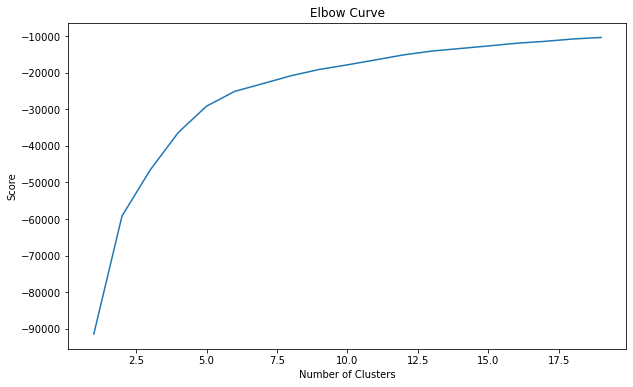

In [71]:
data = df[triads[6]]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

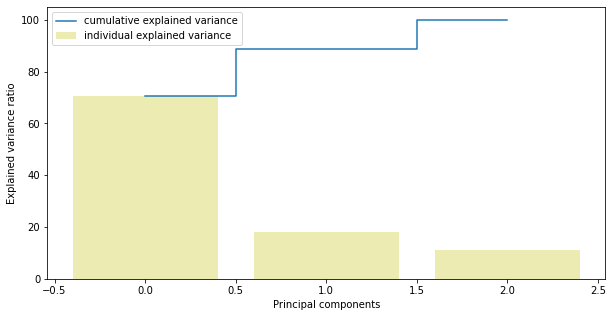

In [73]:
data = df[triads[6]]
X = data.values
X_std = StandardScaler().fit_transform(X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance



plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

<ipython-input-76-1a69c21e7790>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distance = pd.Series()


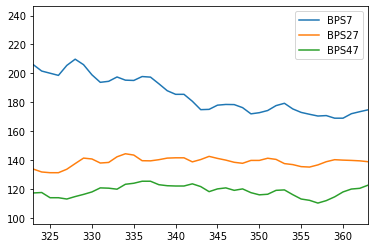

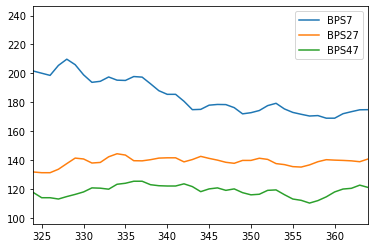

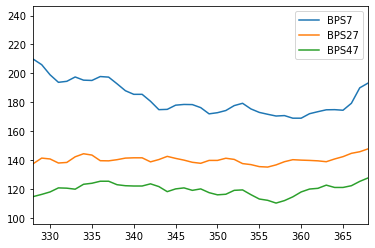

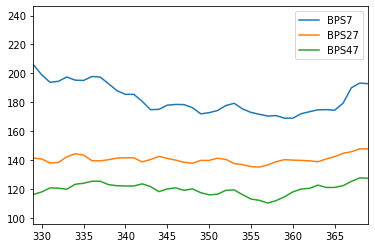

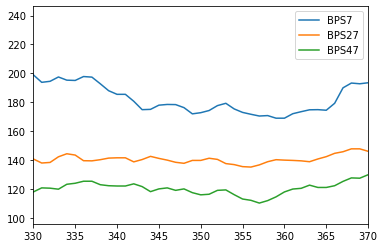

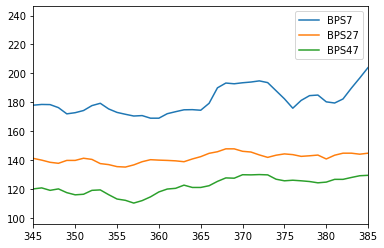

In [76]:
def getDistanceByPoint(data, model):
   distance = pd.Series()
   for i in range(0,len(data)):
       Xa = np.array(data.loc[i])
       Xb = model.cluster_centers_[model.labels_[i]-1]
       distance.at[i]=np.linalg.norm(Xa-Xb)
   return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[5])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly)
df['anomaly1'] = (distance >= threshold).astype(int)

a = df.loc[df['anomaly1'] == 1]
result_set= a.index.tolist()
for i in result_set:
    df[triads[6]].plot(xlim=[i-20,i+20])

In [84]:
def getDistanceByPoint(data, model):
   distance = pd.Series()
   for i in range(0,len(data)):
       Xa = np.array(data.loc[i])
       Xb = model.cluster_centers_[model.labels_[i]-1]
       distance.at[i]=np.linalg.norm(Xa-Xb)
   return distance

df = pd.read_csv('Data/15_Feb_C1_Bad_Case_8am.csv')
c_result=[]

for curr in triads[4:8]:
    data= df[triad
    
    outliers_fraction = 0.01
    scaler = StandardScaler()
    outliers_fraction = 0.01
    # get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
    distance = getDistanceByPoint(data, kmeans[5])
    number_of_outliers = int(outliers_fraction*len(distance))
    threshold = distance.nlargest(number_of_outliers).min()
    # anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly)
    df['anomaly1'] = (distance >= threshold).astype(int)

    a = df.loc[df['anomaly1'] == 1]
    union = a.index.tolist()
    c_result.append(union)

<ipython-input-84-9bb2bbf9b3a8>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distance = pd.Series()
<ipython-input-84-9bb2bbf9b3a8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anomaly1'] = (distance >= threshold).astype(int)


KeyError: 'anomaly1'

In [82]:
c_result

[[52, 53, 54, 55, 56, 57, 58, 59, 90, 93, 94, 95, 96],
 [99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 532, 533, 534],
 [294, 342, 343, 344, 345, 346, 347, 348, 349, 350, 363, 365, 366],
 [293, 303, 311, 312, 313, 337, 351, 352, 353, 374, 375, 376, 377]]

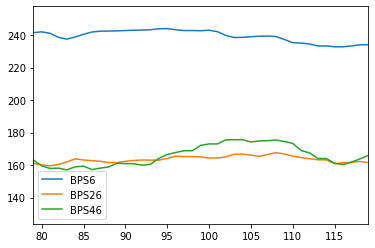

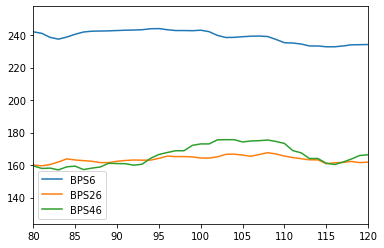

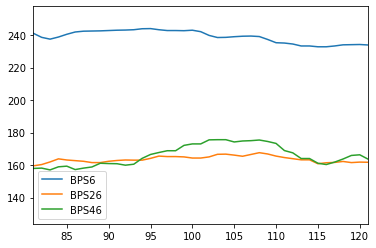

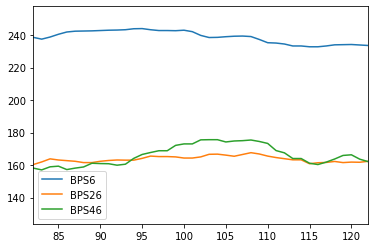

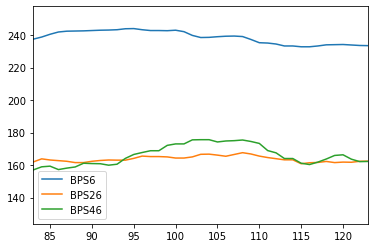

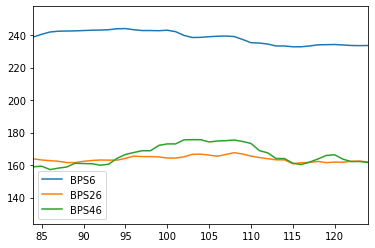

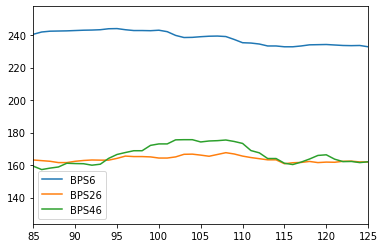

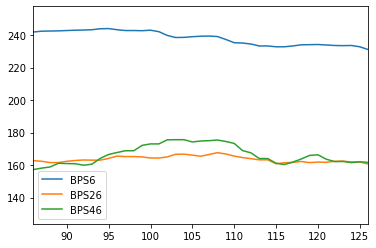

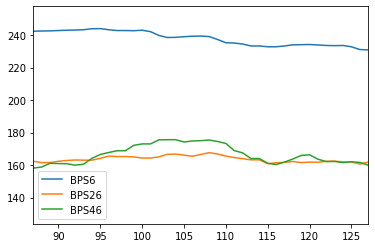

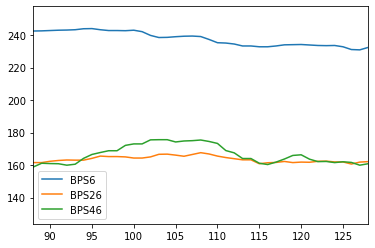

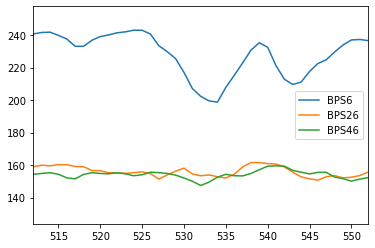

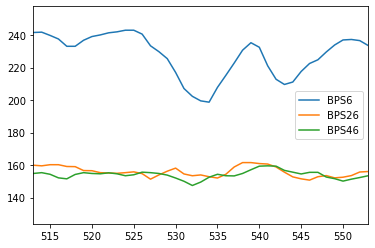

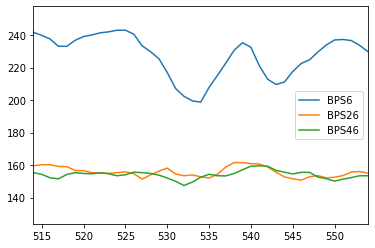

In [83]:
for i in c_result[1]:
    df[triads[5]].plot(xlim=[i-20,i+20])

# On New data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]

df = pd.read_csv('LFC Bad data/LFC_Bad_3.csv')

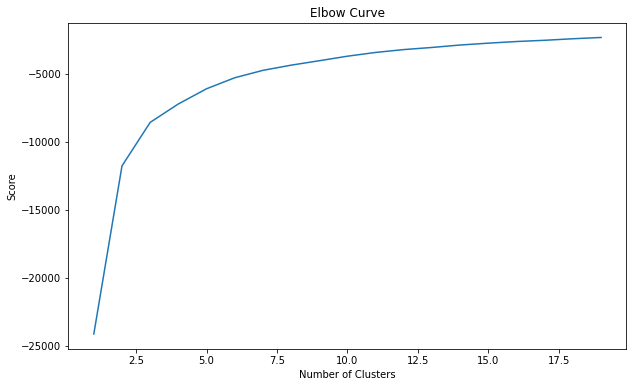

In [2]:
data = df[triads[11]]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

#elbow 3

<ipython-input-3-657281d9d573>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distance = pd.Series()


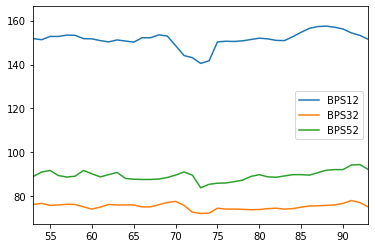

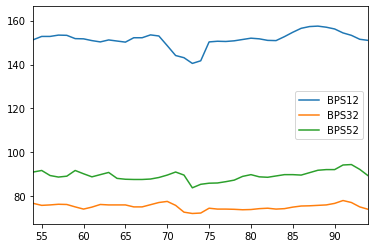

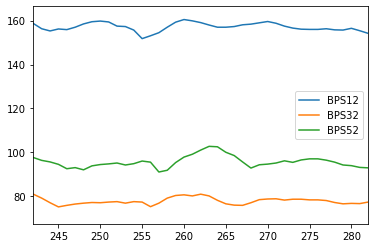

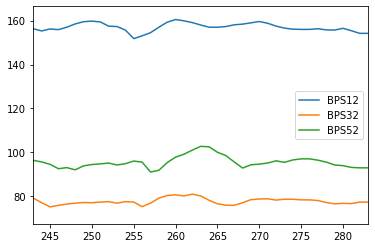

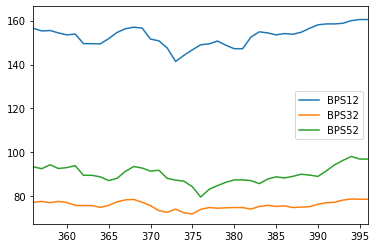

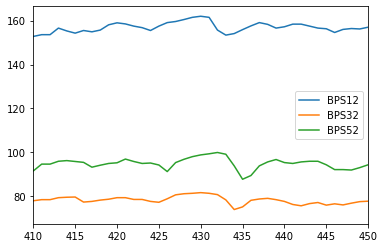

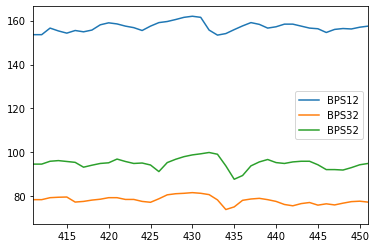

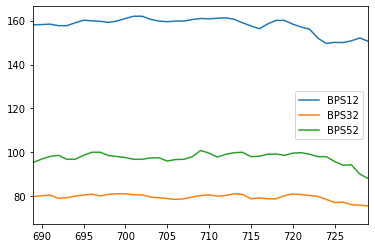

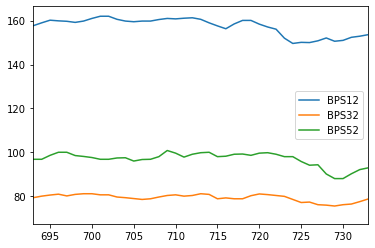

In [3]:
def getDistanceByPoint(data, model):
   distance = pd.Series()
   for i in range(0,len(data)):
       Xa = np.array(data.loc[i])
       Xb = model.cluster_centers_[model.labels_[i]-1]
       distance.at[i]=np.linalg.norm(Xa-Xb)
   return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[2])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly)
df['anomaly1'] = (distance >= threshold).astype(int)

a = df.loc[df['anomaly1'] == 1]
result_set= a.index.tolist()
for i in result_set:
    df[triads[11]].plot(xlim=[i-20,i+20])